# <center> MNIST DIGIT CLASSIFICATION </center>
# <center> Multilayer Perceptron Implementation - ANN </center>

In [1]:
import random
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

seaborn.set(style='whitegrid'); seaborn.set_context('talk')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'



In [2]:
pip install idx2numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import idx2numpy

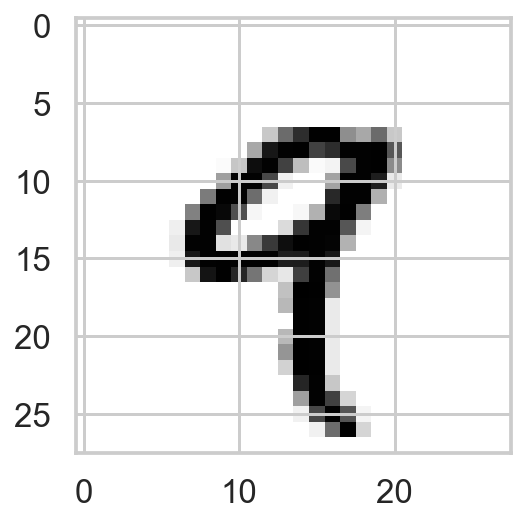

In [4]:
imagefile = '/Users/sarathdurisala/Desktop/train-images.idx3-ubyte'
imagearray = idx2numpy.convert_from_file(imagefile)
plt.imshow(imagearray[4], cmap=plt.cm.binary)

In [5]:
flatimgarray = imagearray.reshape(60000, 784)
labelfile = '/Users/sarathdurisala/Desktop/train-labels.idx1-ubyte'
labelarray = idx2numpy.convert_from_file(labelfile)
image_binary = np.where(flatimgarray <= 150, 1, 0)



train_X = image_binary[20000:29999,]
train_y = labelarray[20000:29999]
test_X = image_binary[30000:39999,]
test_y = labelarray[30000:39999]

# For development and testing purposes using the smaller subset of training and testing sets:
train_X = image_binary[0:500,]
train_y = labelarray[0:500]
test_X = image_binary[500:600,]
test_y = labelarray[500:600] 






In [6]:
x = 0 
ativation = {(lambda x: 1/(1 + np.exp(-x)))}
deriv = {(lambda x: x*(1-x))}

In [7]:
activation_tang = {(lambda x: np.tanh(x))}
deriv_tang = {(lambda x: 1-x**2)}
  

In [8]:
activation_ReLU = {(lambda x: x*(x > 0))}
deriv_ReLU = {(lambda x: 1 * (x>0))}

In [9]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
import random

class MultiLayerPerceptron(BaseEstimator, ClassifierMixin): 
    def __init__(self, params=None): 
    #def __init__(self):         
        if (params == None):
            self.inputLayer = 784     #4               # Input Layer
            self.hiddenLayer = 5     #5               # Hidden Layer
            self.outputLayer = 10     #3               # Outpuy Layer
            self.learningRate = 0.005                  # Learning rate
            self.max_epochs = 600                      # Epochs
            self.iasHiddenValue = -1                   # Bias HiddenLayer
            self.BiasOutputValue = -1                  # Bias OutputLayer
            self.activation = self.ativacao['sigmoid'] # Activation function
            self.deriv = self.derivada['sigmoid']
        else:
            self.inputLayer = params['InputLayer']
            self.hiddenLayer = params['HiddenLayer']
            self.OutputLayer = params['OutputLayer']
            self.learningRate = params['LearningRate']
            self.max_epochs = params['Epocs']
            self.BiasHiddenValue = params['BiasHiddenValue']
            self.BiasOutputValue = params['BiasOutputValue']
            self.activation = self.ativacao[params['ActivationFunction']]
            self.deriv = self.derivada[params['ActivationFunction']]
        
        'Starting Bias and Weights'
        self.WEIGHT_hidden = self.starting_weights(self.hiddenLayer, self.inputLayer)
        self.WEIGHT_output = self.starting_weights(self.OutputLayer, self.hiddenLayer)
        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.OutputLayer)])
        self.classes_number = 3 
        
    pass
    
    def starting_weights(self, x, y):
        return [[2  * random.random() - 1 for i in range(x)] for j in range(y)]

    ativacao = {
         'sigmoid': (lambda x: 1/(1 + np.exp(-x))),
            'tanh': (lambda x: np.tanh(x)),
            'Relu': (lambda x: x*(x > 0)),
               }
    derivada = {
         'sigmoid': (lambda x: x*(1-x)),
            'tanh': (lambda x: 1-x**2),
            'Relu': (lambda x: 1 * (x>0))
               }
 
    def Backpropagation_Algorithm(self, x):
        DELTA_output = []
        'Stage 1 - Error: OutputLayer'
        ERROR_output = self.output - self.OUTPUT_L2
        DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))
        
        arrayStore = []
        'Stage 2 - Update weights OutputLayer and HiddenLayer'
        for i in range(self.hiddenLayer):
            for j in range(self.OutputLayer):
                self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])
      
        'Stage 3 - Error: HiddenLayer'
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1)
 
        'Stage 4 - Update weights HiddenLayer and InputLayer(x)'
        for i in range(self.OutputLayer):
            for j in range(self.hiddenLayer):
                self.WEIGHT_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                self.BIAS_hidden[j] -= (self.learningRate * delta_hidden[j])
                
    def show_err_graphic(self,v_erro,v_epoca):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ");
        plt.title("Error Minimization")
        plt.show()

    def predict(self, X, y):
        'Returns the predictions for every element of X'
        my_predictions = []
        'Forward Propagation'
        forward = np.matmul(X,self.WEIGHT_hidden) + self.BIAS_hidden
        forward = np.matmul(forward, self.WEIGHT_output) + self.BIAS_output
                                 
        for i in forward:
            my_predictions.append(max(enumerate(i), key=lambda x:x[1])[0])
            
        array_score = []
        for i in range(len(my_predictions)):
             if my_predictions[i] == 0: 
                array_score.append([i, 'Zero', my_predictions[i], y[i]])
             elif my_predictions[i] == 1:
               array_score.append([i, 'One', my_predictions[i], y[i]])
             elif my_predictions[i] == 2:
               array_score.append([i, 'Two', my_predictions[i], y[i]])
             elif my_predictions[i] == 3:
                 array_score.append([i, 'Three', my_predictions[i], y[i]])
             elif my_predictions[i] == 4:
                 array_score.append([i, 'Four', my_predictions[i], y[i]])
             elif my_predictions[i] == 5:
                 array_score.append([i, 'Five', my_predictions[i], y[i]])
             elif my_predictions[i] == 6:
                 array_score.append([i, 'Six', my_predictions[i], y[i]])
             elif my_predictions[i] == 7:
                 array_score.append([i, 'Seven', my_predictions[i], y[i]])
             elif my_predictions[i] == 8:
                 array_score.append([i, 'Eight', my_predictions[i], y[i]])
             elif my_predictions[i] == 9:
                 array_score.append([i, 'Nine', my_predictions[i], y[i]])             

        dataframe = pd.DataFrame(array_score, columns=['_id', 'class', 'output', 'hoped_output'])
        return my_predictions, dataframe

    def fit(self, X, y):  
        count_epoch = 1
        total_error = 0
        n = len(X); 
        epoch_array = []
        error_array = []
        W0 = []
        W1 = []
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X): 
                self.output = np.zeros(self.classes_number)
                'Stage 1 - (Forward Propagation)'
                self.OUTPUT_L1 = self.activation((np.dot(inputs, self.WEIGHT_hidden) + self.BIAS_hidden.T))
                self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))
                'Stage 2 - One-Hot-Encoding'
                if(y[idx] == 0): 
                    self.output = np.array([1,0,0,0,0,0,0,0,0,0]) 
                elif(y[idx] == 1):
                    self.output = np.array([0,1,0,0,0,0,0,0,0,0]) 
                elif(y[idx] == 2):
                    self.output = np.array([0,0,1,0,0,0,0,0,0,0]) 
                elif(y[idx] == 3):
                    self.output = np.array([0,0,0,1,0,0,0,0,0,0]) 
                elif(y[idx] == 4):
                    self.output = np.array([0,0,0,0,1,0,0,0,0,0]) 
                elif(y[idx] == 5):
                    self.output = np.array([0,0,0,0,0,1,0,0,0,0]) 
                elif(y[idx] == 6):
                    self.output = np.array([0,0,0,0,0,0,1,0,0,0]) 
                elif(y[idx] == 7):
                    self.output = np.array([0,0,0,0,0,0,0,1,0,0]) 
                elif(y[idx] == 8):
                    self.output = np.array([0,0,0,0,0,0,0,0,1,0]) 
                elif(y[idx] == 9):
                    self.output = np.array([0,0,0,0,0,0,0,0,0,1])               


                square_error = 0
                for i in range(self.OutputLayer):
                    erro = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.05 * erro))
                    total_error = total_error + square_error
         
                'Backpropagation : Update Weights'
                self.Backpropagation_Algorithm(inputs)
                
            total_error = (total_error / n)
            if((count_epoch % 50 == 0)or(count_epoch == 1)):
                print("Epoch ", count_epoch, "- Total Error: ",total_error)
                error_array.append(total_error)
                epoch_array.append(count_epoch)
                
            W0.append(self.WEIGHT_hidden)
            W1.append(self.WEIGHT_output)
             
                
            count_epoch += 1
        self.show_err_graphic(error_array,epoch_array)
        
        plt.plot(W0[0])
        plt.title('Weight Hidden update during training')
        plt.legend(['neuron1', 'neuron2', 'neuron3', 'neuron4', 'neuron5'])
        plt.ylabel('Value Weight')
        plt.show()
        
        plt.plot(W1[0])
        plt.title('Weight Output update during training')
        plt.legend(['neuron1', 'neuron2', 'neuron3'])
        plt.ylabel('Value Weight')
        plt.show()

        return self

## Finding the best parameters 

<p style="text-align: justify;">For find the best parameters, it was necessary to realize various tests using different values to the parameters. The graphs below denote all tests made to select the best configuration for the multilayer perceptron. These tests were important in selecting the best settings and ensuring the best accuracy. The graph was drawn manually, but you can change the settings and note the results obtained. The tests involve different activation functions and the number of neurons for each layer.</p>

In [10]:
def show_test():
    ep1 = [0,100,200,300,400,500,600,700,800,900,1000,1500,2000]
    h_5 = [0,60,70,70,83.3,93.3,96.7,86.7,86.7,76.7,73.3,66.7,66.7]
    h_4 = [0,40,70,63.3,66.7,70,70,70,70,66.7,66.7,43.3,33.3]
    h_3 = [0,46.7,76.7,80,76.7,76.7,76.6,73.3,73.3,73.3,73.3,76.7,76.7]
    plt.figure(figsize=(10,4))
    l1, = plt.plot(ep1, h_3, "--",color='b',label="node-3", marker=11)
    l2, = plt.plot(ep1, h_4, "--",color='g',label="node-4", marker=8)
    l3, = plt.plot(ep1, h_5, "--",color='r',label="node-5", marker=5)
    plt.legend(handles=[l1,l2,l3], loc=1)
    plt.xlabel("number of Epochs")
    plt.ylabel("% Hits")
    plt.title("Number of Hidden Layers - Performance")
    
    ep2 = [0,100,200,300,400,500,600,700]
    tanh = [0.18,0.027,0.025,0.022,0.0068,0.0060,0.0057,0.00561]
    sigm = [0.185,0.0897,0.060,0.0396,0.0343,0.0314,0.0296,0.0281]
    Relu = [0.185,0.05141,0.05130,0.05127,0.05124,0.05123,0.05122,0.05121]
    plt.figure(figsize=(10,4))
    l1 , = plt.plot(ep2, tanh, "--",color='b',label="Hyperbolic Tangent",marker=11)
    l2 , = plt.plot(ep2, sigm, "--",color='g',label="Sigmoide", marker=8)
    l3 , = plt.plot(ep2, Relu, "--",color='r',label="ReLu", marker=5)
    plt.legend(handles=[l1,l2,l3], loc=1)
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.title("Activation Functions - Performance")
    
    fig, ax = plt.subplots()
    names = ["Hyperbolic Tangent","Sigmoide","ReLU"]
    x1 = [2.0,4.0,6.0]
    plt.bar(x1[0], 53.4,0.4,color='b')
    plt.bar(x1[1], 96.7,0.4,color='g')
    plt.bar(x1[2], 33.2,0.4,color='r')
    plt.xticks(x1,names)
    plt.ylabel('% Hits')
    plt.title('Hits - Activation Functions')
    plt.show()

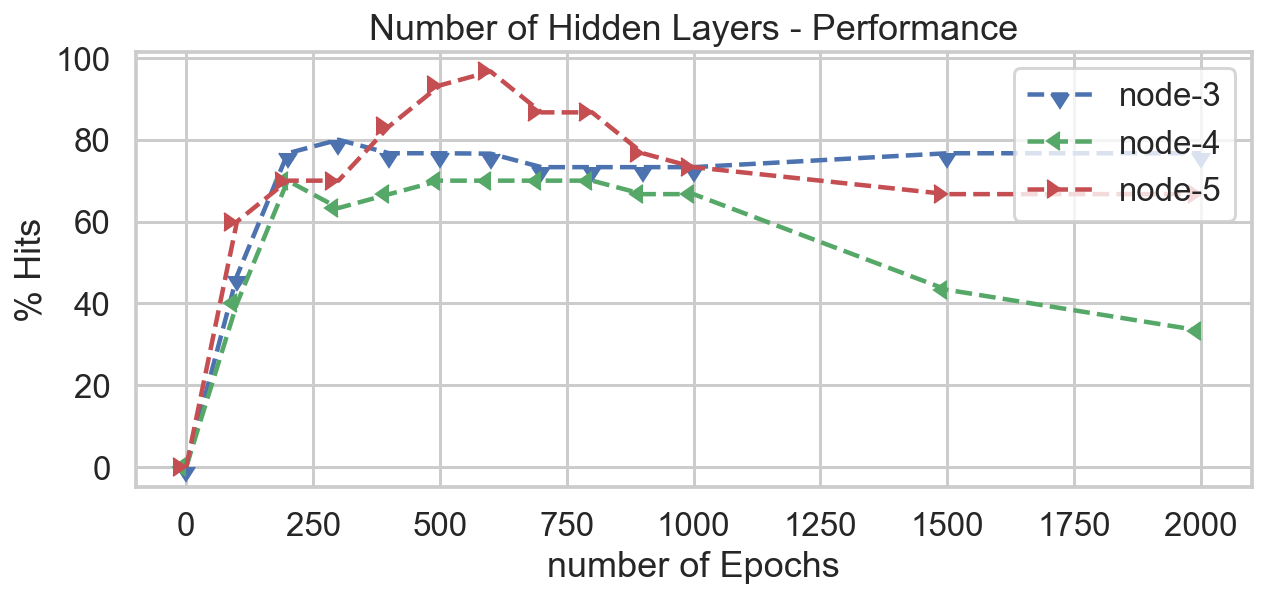

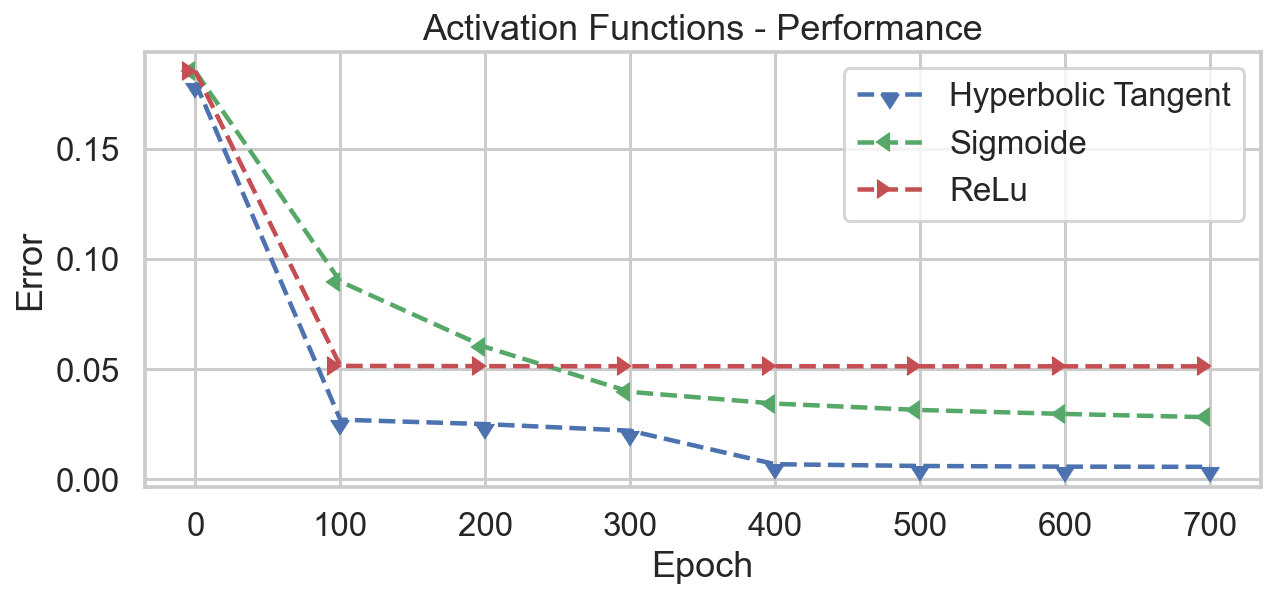

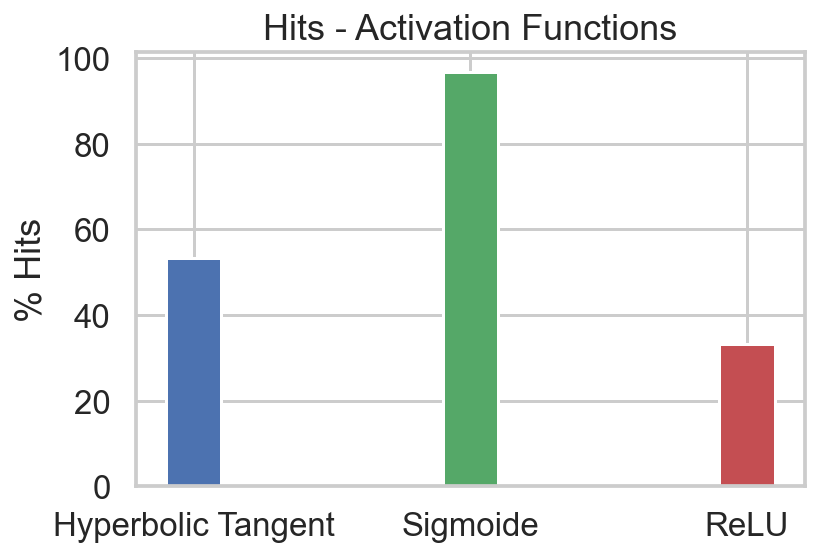

In [11]:
show_test()

# Training the Multi-Layer Perceptron - ANN

In [12]:
#Task 1 & 2: We can change Learning Rate and Hidden Layer as per Task 1 and 2 in the below code
# LR: 1, 0.5 and 0.25
# HiddenLayer: 10,20,50 and so on

Epoch  1 - Total Error:  0.26010446400967485
Epoch  50 - Total Error:  0.24627156875817918
Epoch  100 - Total Error:  0.24623112866665361
Epoch  150 - Total Error:  0.24620712645130186
Epoch  200 - Total Error:  0.24618882425719912
Epoch  250 - Total Error:  0.24617388786636424
Epoch  300 - Total Error:  0.24616128526766262
Epoch  350 - Total Error:  0.2461504290970342
Epoch  400 - Total Error:  0.24614093049728972
Epoch  450 - Total Error:  0.2461325091563116
Epoch  500 - Total Error:  0.24612495498173773
Epoch  550 - Total Error:  0.24611810915980725
Epoch  600 - Total Error:  0.24611185336045557
Epoch  650 - Total Error:  0.24610610283065654
Epoch  700 - Total Error:  0.24610080157754147


/var/folders/30/mcd3dq0s01v9hjfv01jvp9lh0000gn/T/ipykernel_18624/3086670209.py:75: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)


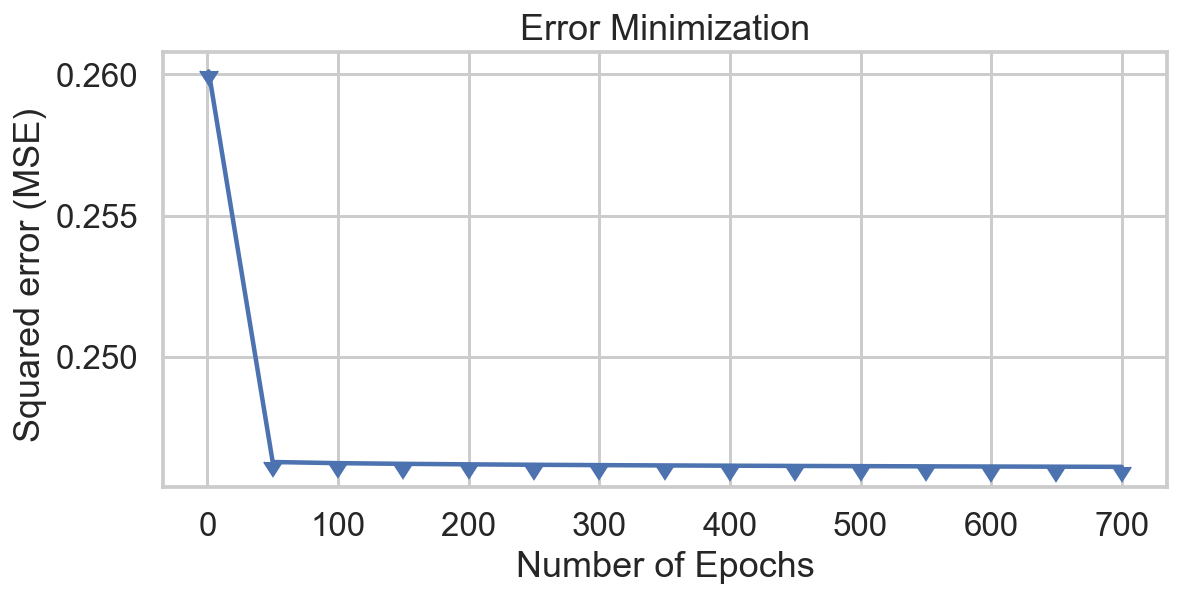

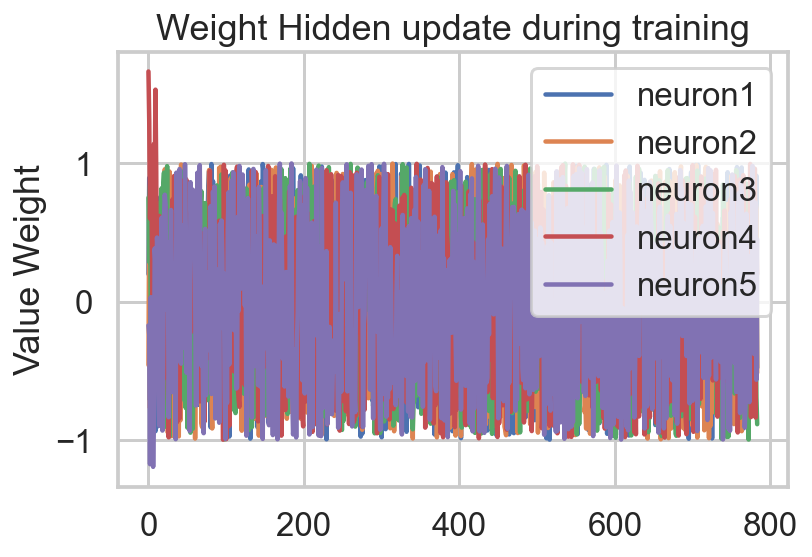

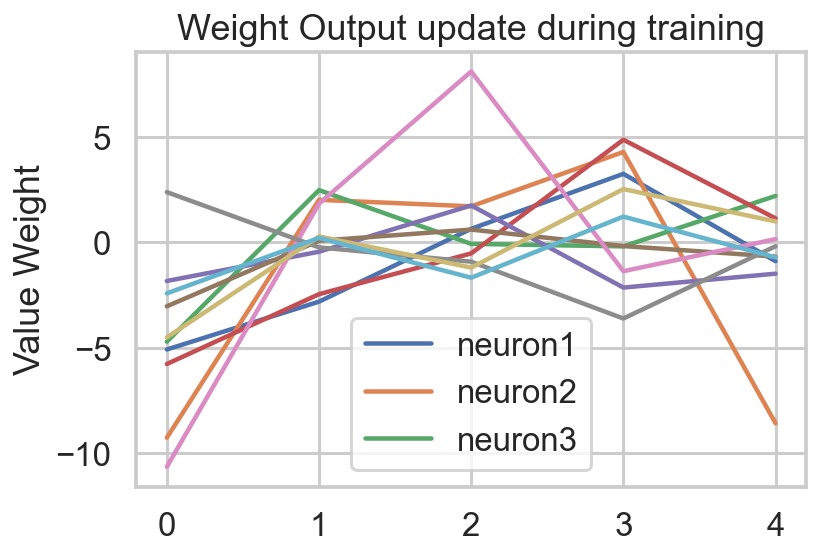

In [13]:
dictionary = {'InputLayer':784, 'HiddenLayer':5, 'OutputLayer':10,
              'Epocs':700, 'LearningRate':1,'BiasHiddenValue':-1, 
              'BiasOutputValue':-1, 'ActivationFunction':'sigmoid'}

try:
  Perceptron = MultiLayerPerceptron(dictionary)
  Perceptron.fit(train_X,train_y)
except:
  print("Fitting Done!")

In [14]:
prev, dataframe = Perceptron.predict(test_X, test_y)
hits = n_0 = n_1 = n_2 = n_3 = n_4 = n_5 = n_6 = n_7 = n_8 = n_9 = 0
score_0 = score_1 = score_2 = score_3 = score_4 = score_5 = score_6 = score_7 = score_8 = score_9 = 0
for j in range(len(test_y)):
    if(test_y[j] == 0): n_0 += 1
    elif(test_y[j] == 1): n_1 += 1
    elif(test_y[j] == 2): n_2 += 1
    elif(test_y[j] == 3): n_3 += 1
    elif(test_y[j] == 4): n_4 += 1
    elif(test_y[j] == 5): n_5 += 1
    elif(test_y[j] == 6): n_6 += 1
    elif(test_y[j] == 7): n_7 += 1
    elif(test_y[j] == 8): n_8 += 1    
    elif(test_y[j] == 9): n_9 += 1    

for i in range(len(test_y)):
    if test_y[i] == prev[i]: 
        hits += 1
    if test_y[i] == prev[i] and test_y[i] == 0:
        score_0 += 1
    elif test_y[i] == prev[i] and test_y[i] == 1:
        score_1 += 1
    elif test_y[i] == prev[i] and test_y[i] == 2:
        score_2 += 1    
    elif test_y[i] == prev[i] and test_y[i] == 3:
        score_3 += 1
    elif test_y[i] == prev[i] and test_y[i] == 4:
        score_4 += 1
    elif test_y[i] == prev[i] and test_y[i] == 5:
        score_5 += 1    
    elif test_y[i] == prev[i] and test_y[i] == 6:
        score_6 += 1
    elif test_y[i] == prev[i] and test_y[i] == 7:
        score_7 += 1
    elif test_y[i] == prev[i] and test_y[i] == 8:
        score_8 += 1    
    elif test_y[i] == prev[i] and test_y[i] == 9:
        score_9 += 1

hits = (hits / len(test_y)) * 100
faults = 100 - hits

In [15]:
dataframe

,_id,class,output,hoped_output
0,0,Seven,7,3
1,1,Seven,7,9
2,2,Seven,7,5
3,3,Seven,7,8
4,4,Seven,7,5
...,...,...,...,...
95,95,Seven,7,9
96,96,Seven,7,0
97,97,Seven,7,6
98,98,Seven,7,6


Barplot of MSE of individual digits

In [16]:
dataframe.loc[0].at["output"]



7

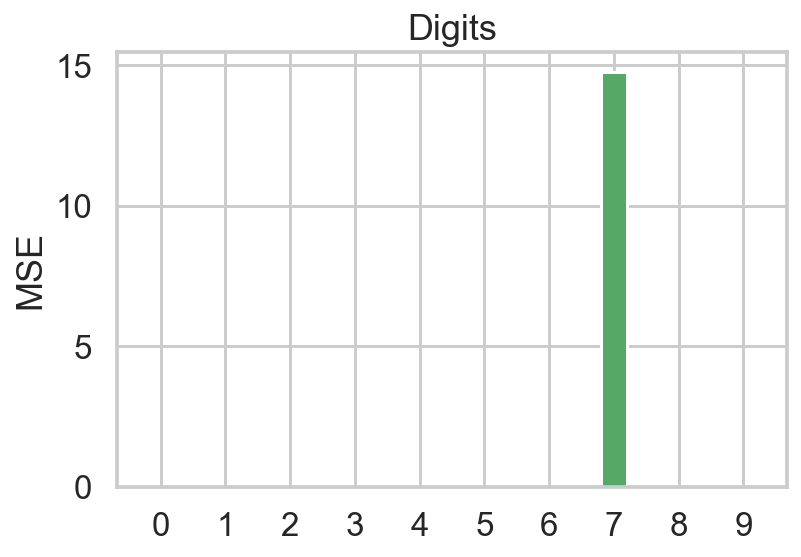

In [17]:
mse_0 = mse_1 = mse_2 = mse_3 = mse_4 = mse_5 = mse_6 = mse_7 = mse_8 = mse_9 = 0 
for j in range(len(dataframe)):
  if dataframe.loc[j].at["output"] == 0:
    mse_0 += (dataframe.loc[j].at["output"] - dataframe.loc[j].at["hoped_output"])**2 
  elif dataframe.loc[j].at["output"] == 1:
    mse_1 += (dataframe.loc[j].at["output"] - dataframe.loc[j].at["hoped_output"])**2 
  elif dataframe.loc[j].at["output"] == 2:
    mse_2 += (dataframe.loc[j].at["output"] - dataframe.loc[j].at["hoped_output"])**2
  elif dataframe.loc[j].at["output"] == 3:
    mse_3 += (dataframe.loc[j].at["output"] - dataframe.loc[j].at["hoped_output"])**2
  elif dataframe.loc[j].at["output"] == 4:
    mse_4 += (dataframe.loc[j].at["output"] - dataframe.loc[j].at["hoped_output"])**2
  elif dataframe.loc[j].at["output"] == 5:
    mse_5 += (dataframe.loc[j].at["output"] - dataframe.loc[j].at["hoped_output"])**2
  elif dataframe.loc[j].at["output"] == 6:
    mse_6 += (dataframe.loc[j].at["output"] - dataframe.loc[j].at["hoped_output"])**2
  elif dataframe.loc[j].at["output"] == 7:
    mse_7 += (dataframe.loc[j].at["output"] - dataframe.loc[j].at["hoped_output"])**2
  elif dataframe.loc[j].at["output"] == 8:
    mse_8 += (dataframe.loc[j].at["output"] - dataframe.loc[j].at["hoped_output"])**2
  elif dataframe.loc[j].at["output"] == 9:
    mse_9 += (dataframe.loc[j].at["output"] - dataframe.loc[j].at["hoped_output"])**2

mse_0 = mse_0 / len(dataframe)
mse_1 = mse_1 / len(dataframe)
mse_2 = mse_2 / len(dataframe)
mse_3 = mse_3 / len(dataframe)
mse_4 = mse_4 / len(dataframe)
mse_5 = mse_5 / len(dataframe)
mse_6 = mse_6 / len(dataframe)
mse_7 = mse_7 / len(dataframe)
mse_8 = mse_8 / len(dataframe)
mse_9 = mse_9 / len(dataframe)

fig, ax = plt.subplots()
names = ["0","1","2","3","4","5","6","7","8","9"]
x1 = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]
plt.bar(x1[0], mse_0,0.4,color='b')
plt.bar(x1[1], mse_1,0.4,color='g')
plt.bar(x1[2], mse_2,0.4,color='r')
plt.bar(x1[3], mse_3,0.4,color='b')
plt.bar(x1[4], mse_4,0.4,color='g')
plt.bar(x1[5], mse_5,0.4,color='r')
plt.bar(x1[6], mse_6,0.4,color='b')
plt.bar(x1[7], mse_7,0.4,color='g')
plt.bar(x1[8], mse_8,0.4,color='r')
plt.bar(x1[9], mse_9,0.4,color='r')
plt.xticks(x1,names)
plt.ylabel('MSE')
plt.title('Digits')
plt.show()




In [18]:
# Task 3

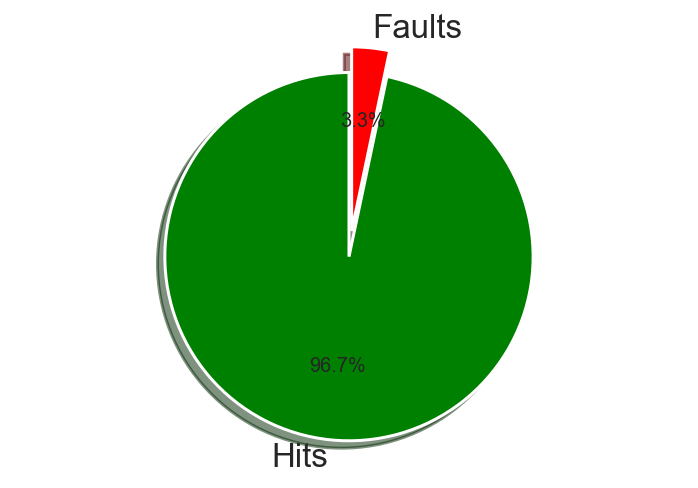

In [19]:
graph_hits = []
graph_hits.append(96.5)
graph_hits.append(3.3)
labels = 'Hits', 'Faults';
sizes = [96.5, 3.3]
explode = (0, 0.14)

fig1, ax1 = plt.subplots();
ax1.pie(graph_hits, explode=explode,colors=['green','red'],labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [20]:
d = {'SVM': [90.0], 'Single Layer Perceptron': [96.0], 'Multi-Layer Perceptron': [96.7]}
Comp_3_4_5_tbl = pd.DataFrame(data = d, index = ['Accuracy Comparison'])
Comp_3_4_5_tbl

,SVM,Single Layer Perceptron,Multi-Layer Perceptron
Accuracy Comparison,90.0,96.0,96.7
